<a href="https://colab.research.google.com/github/HanifRafandi014/3D_Machine_Learning/blob/main/UTS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kelompok 1 UTS Machine Laerning

Nama Anggota :

1. Afdhol
2. Brilliyand
3. Hanif Naufal Rafandi / 2141720127 / 14

Kelas : 3D

# Segmentasi Gambar dengan Clustering

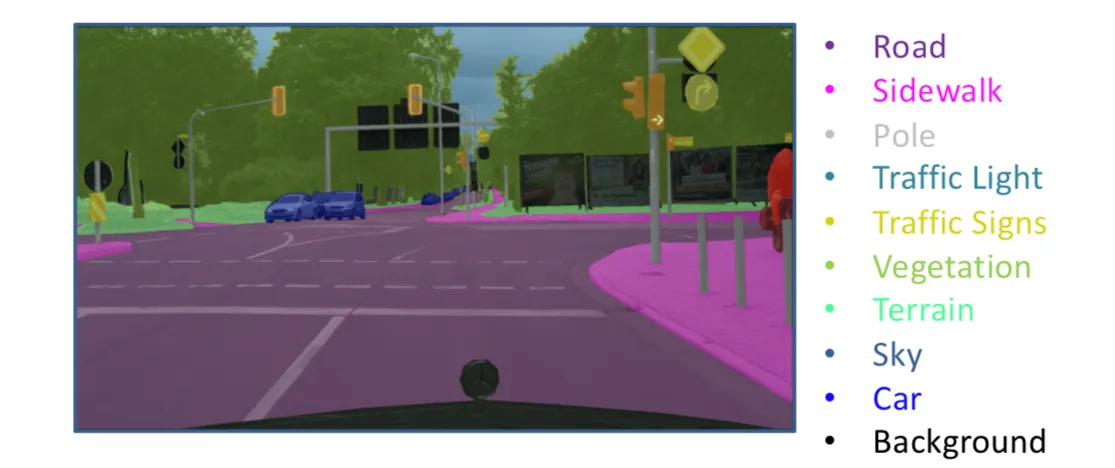

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

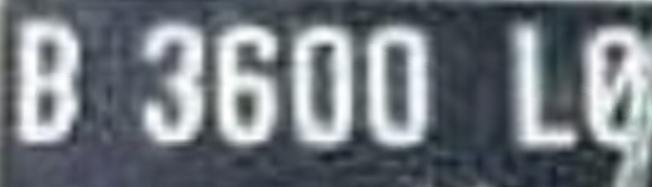

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

**Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [92]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

**Load Data**

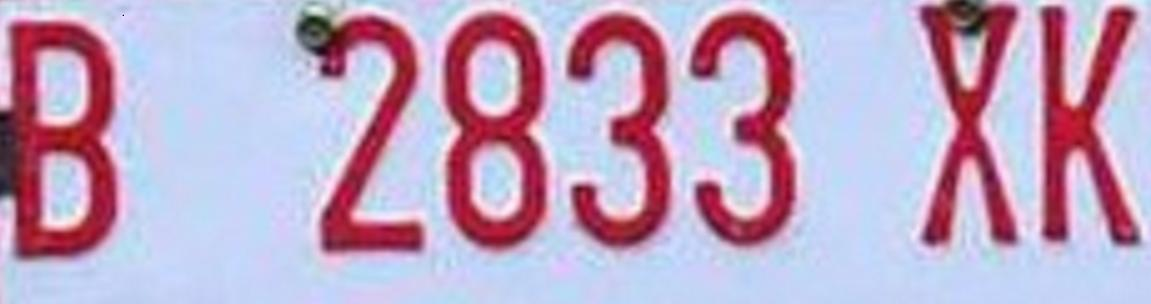

In [93]:
# Load Gambar
img = cv2.imread('/content/drive/MyDrive/File Machine Learning/dummy/dummy/2.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

**Menampilkan tinggi, lebar, dan warna (BGR)**

In [94]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [95]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

**Mengambil random dataset dan menampilkan dalam bentuk plot pixel**

In [110]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

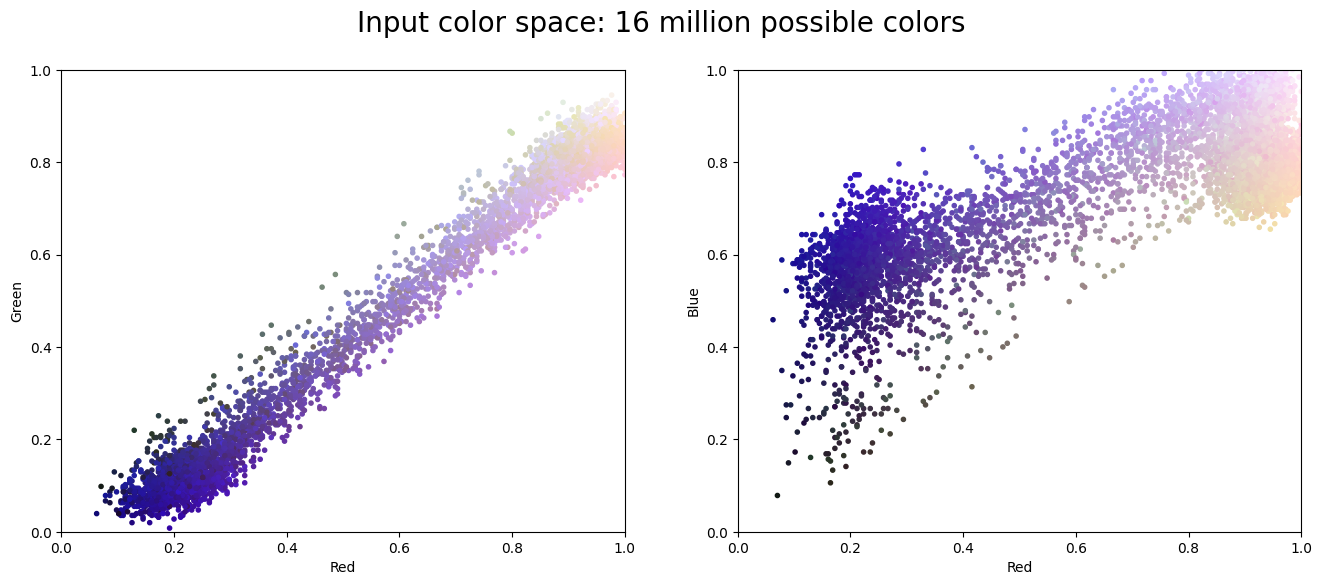

In [111]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# Contoh Hasil Yang Diharapkan

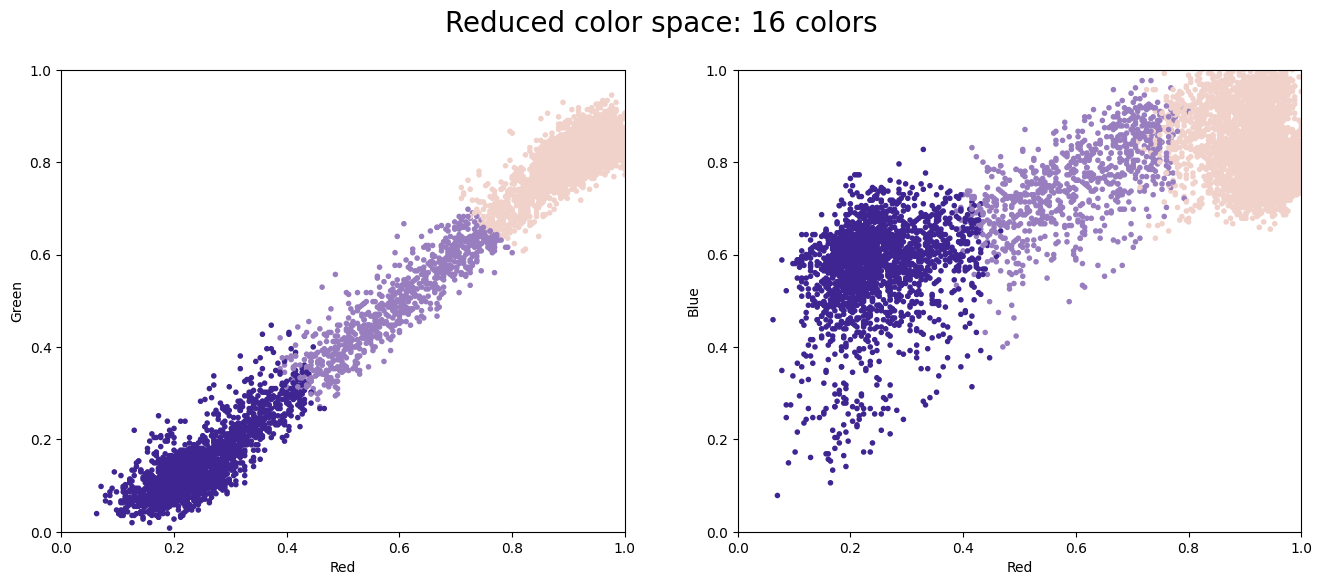

In [112]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(3)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

Text(0.5, 1.0, 'Recolored Image')

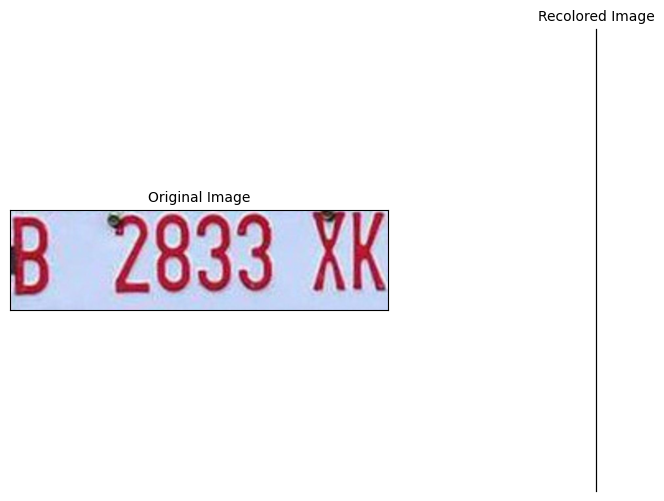

In [113]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Pastikan Anda menggunakan img_rgb dan new_colors yang benar
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=10)
ax[1].imshow(new_colors.astype(np.uint8))  # Jangan lupa untuk mengonversi ke tipe data uint8
ax[1].set_title('Recolored Image', size=10)

# **Tugas UTS**

**Import Library**

In [114]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans





















Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.



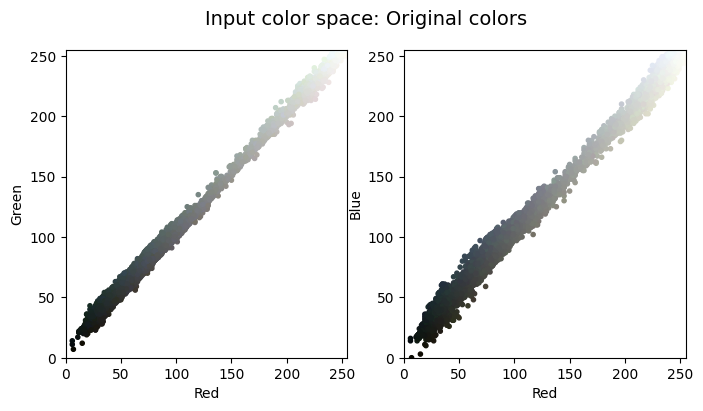

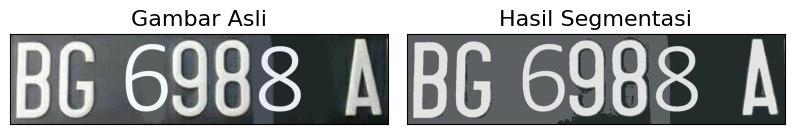

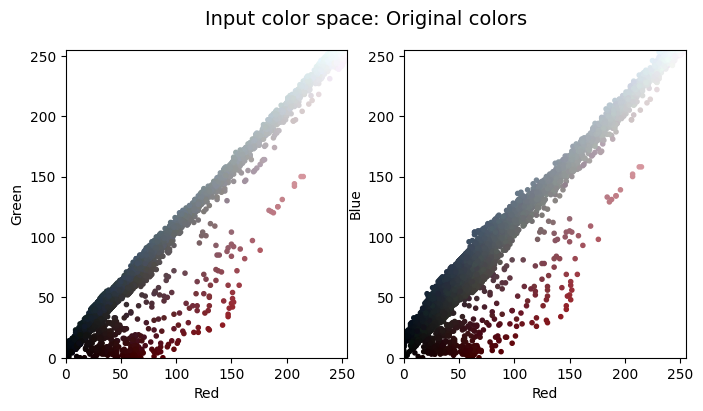

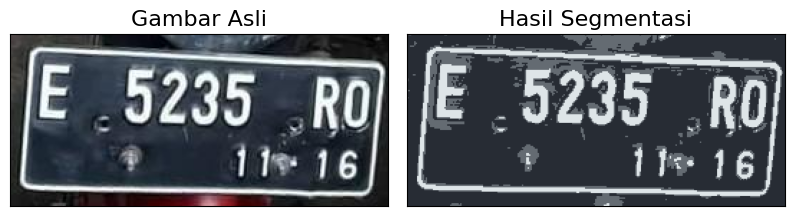

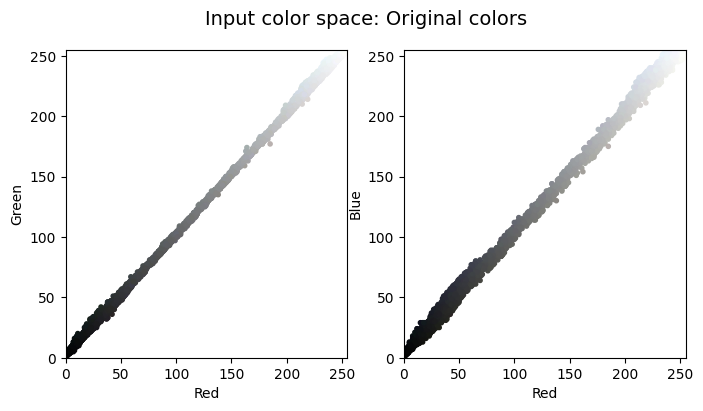

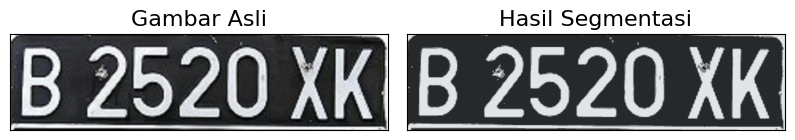

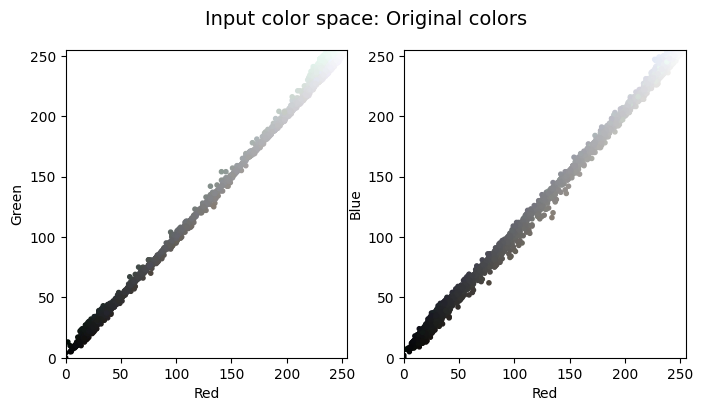

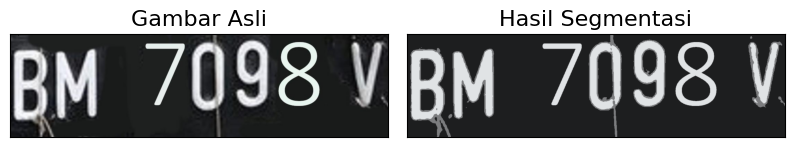

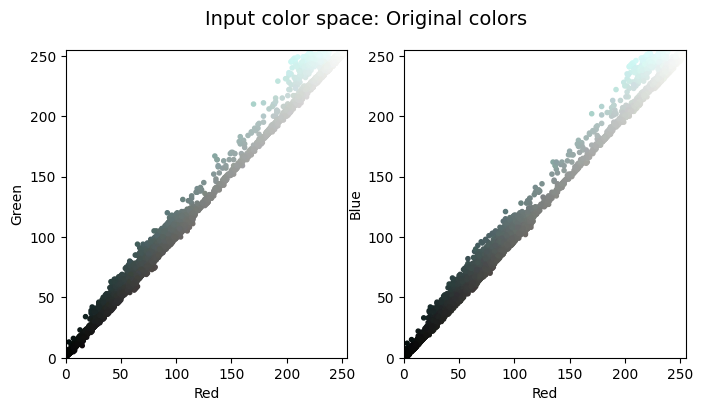

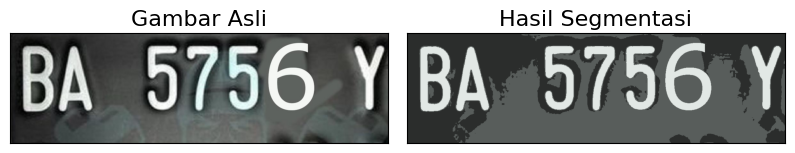

In [122]:
# Tentukan jumlah cluster (dalam hal ini, 3 cluster)
num_clusters = 3

# Tentukan direktori tempat gambar-gambar Anda berada
img_acak = "/content/drive/MyDrive/File Machine Learning/dummy/dummy"  # Ganti dengan path direktori yang sesuai

# Dapatkan semua file gambar dalam direktori
image_files = [file for file in os.listdir(img_acak) if file.endswith((".jpg", ".jpeg", ".png"))]

selected_images = random.sample(image_files, 5)

# Loop melalui setiap file gambar yang dipilih secara acak
for image_file in selected_images:
    # Dapatkan path lengkap ke file gambar
    image_path = os.path.join(img_acak, image_file)

    # Baca gambar
    img = cv2.imread(image_path)

    # Konversi gambar ke ruang warna RGB (jika belum dalam ruang warna tersebut)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    h, w, ch = img_rgb.shape

    data = img_rgb.reshape(h * w, ch)

    def plot_pixels(data, title, colors=None, N=10000):
        if colors is None:
            colors = data

        # Pilih subset data acak
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T

        fig, ax = plt.subplots(1, 2, figsize=(8, 4))
        ax[0].scatter(R, G, c=colors/255.0, marker='.')
        ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

        ax[1].scatter(R, B, c=colors/255.0, marker='.')
        ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

        fig.suptitle(title, size=14)
        print("\n")

    plot_pixels(data, title='Input color space: Original colors')

    # Definisikan model k-means dengan lebih sedikit cluster (misalnya, 2 cluster)
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=1) # Jumlah cluster yang Anda inginkan

    # Fit data ke model k-means
    kmeans.fit(data)

    # Mendapatkan nilai titik tengah dari setiap cluster
    cluster_centers = kmeans.cluster_centers_

    # Tambahkan inisialisasi new_colors
    new_colors = cluster_centers[kmeans.labels_].reshape(img.shape)

    fig, ax = plt.subplots(1, 2, figsize=(10, 6),
                          subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(wspace=0.05)

    # Pastikan Anda menggunakan img_rgb dan new_colors yang benar
    ax[0].imshow(img_rgb)
    ax[0].set_title('Gambar Asli', size=16)
    ax[1].imshow(new_colors.astype(np.uint8))
    print("\n")  # Jangan lupa untuk mengonversi ke tipe data uint8
    ax[1].set_title('Hasil Segmentasi', size=16)

print("Proses segmentasi dan tampilan gambar selesai untuk 5 gambar yang dipilih secara acak.\n")
